# Segmenting & Clustering: Toronto Neighborhoods
by: Kanishk Kumar (India)
<hr>

This project will use [this](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) Wikipedia page as one of its data sources.

Previously, we have successfully scrapped the table data into a pandas dataframe in the `1_Web_Scraping.ipynb` notebook file and have retrieved the latitude and longitude coordinates in `2_Coordinate_Retrieval.ipynb` notebook file.

__Objective__:
- __Explore__, __segment__, and __group neighborhoods__ into clusters to find similar neighborhoods in __Toronto City__.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

Let's import `toronto_poscode_latlng.csv` and turn it into a dataframe:

In [2]:
toronto_df = pd.read_csv('datasets/toronto_poscode_latlng.csv')
print(toronto_df.shape)
toronto_df.head()

(103, 5)


,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M3A,North York,Parkwoods,43.75245,-79.32991
1,M4A,North York,Victoria Village,43.73057,-79.31306
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.65512,-79.36264
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.72327,-79.45042
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.66253,-79.39188


It looks like for each postal code there might be more than one neighborhood. From now on, we will treat each postal code as a neighborhood also. Let's see how many boroughs and postal codes (neighborhoods) we got:

In [3]:
print('The dataframe has {} boroughs and {} postal codes.'.format(
        len(toronto_df['Borough'].unique()),
        toronto_df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 postal codes.


## Map: Toronto & Neighborhoods

We now have the data required to create a map of each neighborhood coordinate using __Folium__ module. 

But first we need to define the coordinates of Toronto City itself. We can do this by geting the coordinates using __Geopy__ library.

In [4]:
#!pip install geopy
from geopy.geocoders import Nominatim

address = 'Toronto, Ontario'

# Define a unique user_agent
geolocator = Nominatim(user_agent="toronto_explorer")

# Retrieve Toronto coordinate
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


Now, we can see the neighbourhoods being superimposed on top of the city

In [5]:
#!conda install -c conda-forge folium --yes
import folium # map rendering library

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10.5)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_df['latitude'], toronto_df['longitude'], toronto_df['Borough'], toronto_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

## Map: A Borough and Neighborhoods

We will pick boroughs that contain _'toronto'_ name in it.
Let's see what boroughs those are:

In [6]:
toronto_df.groupby(by='Borough').count().sort_values(by='Neighbourhood', ascending=False)

,PostalCode,Neighbourhood,latitude,longitude
Borough,,,,
North York,24,24,24,24
Downtown Toronto,19,19,19,19
Scarborough,17,17,17,17
Etobicoke,12,12,12,12
Central Toronto,9,9,9,9
West Toronto,6,6,6,6
East Toronto,5,5,5,5
East York,5,5,5,5
York,5,5,5,5


Say you currently live at _Northwest_, __Etobicoke__, and you got a new job at __Downtown Toronto__. You want to move there but trying to find a settlement as the same as your current neighborhood.

We will name it __`downtown_df`__ dataframe to rerpresent all neighborhood containing both boroughs.

In [7]:
# downtown_df = toronto_df[toronto_df.Borough.str.contains('Toronto') == True].reset_index(drop=True)
# downtown_df = toronto_df[(toronto_df['Borough']=='Downtown Toronto') | (toronto_df['Borough']=='Etobicoke')].reset_index(drop=True)

boroughs_df = toronto_df[(toronto_df['Borough']=='Central Toronto') | (toronto_df['Borough']=='East York') | (toronto_df['Borough']=='York')].reset_index(drop=True)
print(boroughs_df.shape)
boroughs_df.head()

(19, 5)


,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,"Parkview Hill, Woodbine Gardens",43.70718,-79.31192
1,M4C,East York,Woodbine Heights,43.68970,-79.30682
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046
4,M4G,East York,Leaside,43.70902,-79.36349


In [8]:
# downtown_df['Neighbourhood'].replace('St. James Town, Cabbagetown', 'Cabbagetown', inplace=True)

boroughs_df['Neighbourhood'] = boroughs_df['Neighbourhood'].apply(lambda x: x.split(',')[0])

boroughs_df

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,Parkview Hill,43.70718,-79.31192
1,M4C,East York,Woodbine Heights,43.68970,-79.30682
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046
4,M4G,East York,Leaside,43.70902,-79.36349
5,M4H,East York,Thorncliffe Park,43.70142,-79.34905
6,M4J,East York,East Toronto,43.68811,-79.33418
7,M6M,York,Del Ray,43.69517,-79.48397
8,M4N,Central Toronto,Lawrence Park,43.72843,-79.38713
9,M5N,Central Toronto,Roselawn,43.71208,-79.41848


Let's get the geographical coordinates of North York.

In [9]:
address = 'Central Toronto, Toronto'

geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Central Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Central Toronto are 43.65238435, -79.38356765.


Let's visualize Downtown Toronto and Etobicokewith neighborhoods.

In [10]:
# create map of Toronto using latitude and longitude values
map_Boroughs = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(boroughs_df['latitude'], boroughs_df['longitude'], boroughs_df['Borough'], boroughs_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Boroughs)  
    
map_Boroughs

## Explore a Neighborhood in The Selected Boroughs

Now, we will utilize the FourSquare API to explore Downtown neighborhoods and segment them

1. __Define Foursquare Credentials and Version__

In [11]:
# @hidden_cell
CLIENT_ID = 'JYO1E0RYGAT2EZFEPFFEYAFWRMAUNQS4X53MEAFOVRP4G3FF' # your Foursquare ID
CLIENT_SECRET = '0GYONRQKBUSGHLLMSBIEKXTD1DW4UW4OCJ20PCEWIRO5RF2V' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

# print('Your credentails:')
# print('CLIENT_ID: ' + CLIENT_ID)
# print('CLIENT_SECRET:' + CLIENT_SECRET)

2. __Let's explore the first neighborhood in our dataframe.__

In [12]:
boroughs_df.head(1)

,PostalCode,Borough,Neighbourhood,latitude,longitude
0,M4B,East York,Parkview Hill,43.70718,-79.31192


In [13]:
print('First neighborhood: {}'.format(boroughs_df.loc[0,'Neighbourhood']))

First neighborhood: Parkview Hill


- Get the location coordinate of the neighborhood

In [14]:
neighborhood_latitude = boroughs_df.loc[0, 'latitude'] # neighborhood latitude value
neighborhood_longitude = boroughs_df.loc[0, 'longitude'] # neighborhood longitude value

neighborhood_name = boroughs_df.loc[0, 'Neighbourhood'] # neighborhood name

print('The coordinate values of {} are\n- latitude: {},\n- longitude: {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

The coordinate values of Parkview Hill are
- latitude: 43.70718000000005,
- longitude: -79.31191999999999.


3. __Now, let's get the top 100 venues that are in Parkview Hill within a radius of 500 meters.__

- Create a GET request URL

In [15]:
LIMIT = 100
RADIUS = 750

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        CLIENT_ID, 
        CLIENT_SECRET, 
        VERSION, 
        neighborhood_latitude, 
        neighborhood_longitude,
        RADIUS,
        LIMIT)
# url

- Send the GET request and examine the resutls

In [16]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '602e68952776b86a58183eb6'},
 'response': {'headerLocation': "O'Connor - Parkview",
  'headerFullLocation': "O'Connor - Parkview, Toronto",
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 20,
  'suggestedBounds': {'ne': {'lat': 43.713930006750054,
    'lng': -79.30259978299036},
   'sw': {'lat': 43.70042999325005, 'lng': -79.32124021700962}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b5a3842f964a52023b528e3',
       'name': 'Jawny Bakers',
       'location': {'address': "804 O'Connor Dr",
        'crossStreet': 'St Clair E',
        'lat': 43.705782646822,
        'lng': -79.31291304477831,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.705782646822,
          'lng': -79.31291304477831}],
  

In [17]:
results['response']['groups'][0]['items']

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '4b5a3842f964a52023b528e3',
   'name': 'Jawny Bakers',
   'location': {'address': "804 O'Connor Dr",
    'crossStreet': 'St Clair E',
    'lat': 43.705782646822,
    'lng': -79.31291304477831,
    'labeledLatLngs': [{'label': 'display',
      'lat': 43.705782646822,
      'lng': -79.31291304477831}],
    'distance': 174,
    'postalCode': 'M4B 2S9',
    'cc': 'CA',
    'city': 'Toronto',
    'state': 'ON',
    'country': 'Canada',
    'formattedAddress': ["804 O'Connor Dr (St Clair E)",
     'Toronto ON M4B 2S9',
     'Canada']},
   'categories': [{'id': '4bf58dd8d48988d155941735',
     'name': 'Gastropub',
     'pluralName': 'Gastropubs',
     'shortName': 'Gastropub',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/gastropub_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0

- Based on observation, it seems that all the information is in the __items__ key. Let's put that into a list of venues.

In [18]:
import json # library to handle JSON files
from pandas import json_normalize # tranform JSON file into a pandas dataframe

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.head(2)

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.address,venue.location.crossStreet,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,...,venue.location.postalCode,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.neighborhood
0,e-0-4b5a3842f964a52023b528e3-0,0,"[{'summary': 'This spot is popular', 'type': '...",4b5a3842f964a52023b528e3,Jawny Bakers,804 O'Connor Dr,St Clair E,43.705783,-79.312913,"[{'label': 'display', 'lat': 43.705782646822, ...",...,M4B 2S9,CA,Toronto,ON,Canada,"[804 O'Connor Dr (St Clair E), Toronto ON M4B ...","[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",0,[],NaN
1,e-0-4b6db61ff964a520b9882ce3-1,0,"[{'summary': 'This spot is popular', 'type': '...",4b6db61ff964a520b9882ce3,Toronto Climbing Academy,11 Curity Ave,NaN,43.709362,-79.315006,"[{'label': 'display', 'lat': 43.709362, 'lng':...",...,M4B 1X4,CA,Toronto,ON,Canada,"[11 Curity Ave, Toronto ON M4B 1X4, Canada]","[{'id': '50328a4b91d4c4b30a586d6b', 'name': 'R...",0,[],NaN


- Okay, we have redundant columns that we do not need. We can filter the dataframe containing data columns needed only. 

In [19]:
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head(2)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Jawny Bakers,"[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",43.705783,-79.312913
1,Toronto Climbing Academy,"[{'id': '50328a4b91d4c4b30a586d6b', 'name': 'R...",43.709362,-79.315006


- The column __venue.categories__ is a little unintelligible. Let's extract the category `name` only inside that list of dictionary.

In [20]:
nearby_venues['venue.categories'] = nearby_venues['venue.categories'].apply(lambda x: x[0]['name'])
nearby_venues.head(2)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Jawny Bakers,Gastropub,43.705783,-79.312913
1,Toronto Climbing Academy,Rock Climbing Spot,43.709362,-79.315006


- Let's clean the column names and see the how many venues are returned by FourSquare.

In [21]:
nearby_venues.columns = [column.split('.')[-1] for column in nearby_venues.columns]
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))
nearby_venues.head()

20 venues were returned by Foursquare.


,name,categories,lat,lng
0,Jawny Bakers,Gastropub,43.705783,-79.312913
1,Toronto Climbing Academy,Rock Climbing Spot,43.709362,-79.315006
2,East York Gymnastics,Gym / Fitness Center,43.710654,-79.309279
3,Muddy York Brewing Co.,Brewery,43.712362,-79.312019
4,Shoppers Drug Mart,Pharmacy,43.705933,-79.312825


## Explore Neihborhoods in The Selected Boroughs

- __Let's create a function to repeat the same process to all the neighborhoods in Downtown Toronto__

_Double click __here__ for the explanation_
<!--
[item for venue_list in venues_list for item in venue_list]
equals to:

for venue_list in downtown_venues:
    for item in venue_list:
        print(item)

- Result
('Regent Park, Harbourfront', 43.65512000000007, -79.36263999999993, 'Roselle Desserts', 
 43.653446723052674, -79.3620167174383, 'Bakery')
('Regent Park, Harbourfront', 43.65512000000007, -79.36263999999993, 'Tandem Coffee', 
 43.65355870959944, -79.36180945913513, 'Coffee Shop')
('Regent Park, Harbourfront', 43.65512000000007, -79.36263999999993, 'Figs Breakfast & Lunch', 
 43.65567455427388, -79.3645032892494, 'Breakfast Spot')
.......

-->

In [22]:
# get_nerby_venues(downtown_df['neighbourhood'], downtown_df['latitude'], downtown_df['longitude'])
# Return downtown_venues
def get_nearby_venues(neighborhoods, latitudes, longitudes):
    
    # Define default result limit and radius
    LIMIT = 100
    RADIUS = 1000
    
    # Define an empty venue list
    venues_list = []
    
    # Loop for each neighborhood (i.e. 1st neighborhood = Regent Park)
    for neighborhood, lat, lng in zip(neighborhoods, latitudes, longitudes):
        # Confirm the name of naighborhood
        print(neighborhood) # Regent Park
        
        # Create an API URL for each neighborhood to explore its venues
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng,
                RADIUS,
                LIMIT)
        
        # Make the GET request and return a JSON file
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # Return only relevant information for each nearby venue (explanation is below the notebook)
        venues_list.append([(neighborhood, 
                            lat, 
                            lng,  
                            v['venue']['name'],
                            v['venue']['location']['lat'],
                            v['venue']['location']['lng'],
                            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])    
    nearby_venues.columns = ['Neighborhood', 
          'Neighborhood Latitude', 
          'Neighborhood Longitude', 
          'Venue', 
          'Venue Latitude', 
          'Venue Longitude', 
          'Venue Category']
    
    return(nearby_venues)

In [23]:
# type your answer here
boroughs_venues = get_nearby_venues(boroughs_df['Neighbourhood'], 
                                   boroughs_df['latitude'], 
                                   boroughs_df['longitude'])

Parkview Hill
Woodbine Heights
Humewood-Cedarvale
Caledonia-Fairbanks
Leaside
Thorncliffe Park
East Toronto
Del Ray
Lawrence Park
Roselawn
Runnymede
Weston
Davisville North
Forest Hill North & West
North Toronto West
The Annex
Davisville
Moore Park
Summerhill West


In [24]:
print(boroughs_venues.shape)
boroughs_venues.to_csv('datasets/boroughs_venues.csv', index=False)
boroughs_venues.head()

(899, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkview Hill,43.70718,-79.31192,Toronto Climbing Academy,43.709362,-79.315006,Rock Climbing Spot
1,Parkview Hill,43.70718,-79.31192,Jawny Bakers,43.705783,-79.312913,Gastropub
2,Parkview Hill,43.70718,-79.31192,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center
3,Parkview Hill,43.70718,-79.31192,Muddy York Brewing Co.,43.712362,-79.312019,Brewery
4,Parkview Hill,43.70718,-79.31192,Peek Freans Cookie Outlet,43.713260,-79.308063,Bakery


In [25]:
boroughs_venues[boroughs_venues.Neighborhood=='Roselawn']

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
318,Roselawn,43.71208,-79.41848,Belt Line Trail,43.704396,-79.424254,Trail
319,Roselawn,43.71208,-79.41848,Forest Hill Arena,43.704289,-79.420367,Skating Rink
320,Roselawn,43.71208,-79.41848,TD Canada Trust,43.712212,-79.428233,Bank
321,Roselawn,43.71208,-79.41848,Shoppers Drug Mart,43.712652,-79.428040,Pharmacy
322,Roselawn,43.71208,-79.41848,Shoppers Drug Mart,43.703442,-79.415367,Pharmacy
323,Roselawn,43.71208,-79.41848,Lytton Park,43.714954,-79.411970,Playground
324,Roselawn,43.71208,-79.41848,Jewel & Java Café,43.712467,-79.427999,Café


Let's check how many venues were returned for each neighborhood

In [26]:
boroughs_venues.groupby( by='Neighborhood').count().sort_values(by='Venue', ascending=False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Davisville,100,100,100,100,100,100
The Annex,100,100,100,100,100,100
Davisville North,99,99,99,99,99,99
Summerhill West,89,89,89,89,89,89
Moore Park,65,65,65,65,65,65
Woodbine Heights,65,65,65,65,65,65
Leaside,61,61,61,61,61,61
East Toronto,58,58,58,58,58,58
North Toronto West,51,51,51,51,51,51


__Let's find out how many unique categories can be curated from all the returned venues__

In [27]:
print('There are {} unique venue categories.'.format(len(boroughs_venues['Venue Category'].unique())))

There are 179 unique venue categories.


## Analyze Each Neighborhood

__Our next objective is to create a dataframe containing the top 10 venues for each neighborhood.__

__1. First, we will do the One Hot Encoding to the venue category for each neighborhood.__

In [28]:
# one hot encoding and adjust the name prefix
boroughs_onehot = pd.get_dummies(boroughs_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to the dataframe
boroughs_onehot['Neighbourhood'] = boroughs_venues['Neighborhood']

# # move neighborhood column to the first column
fixed_columns = [boroughs_onehot.columns[-1]] + list(boroughs_onehot.columns[:-1])
boroughs_onehot = boroughs_onehot[fixed_columns]
boroughs_onehot.head()

,Neighbourhood,ATM,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Parkview Hill,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
len(boroughs_onehot.Neighbourhood.unique())

19

- And let's examine the new dataframe size.

In [30]:
print(boroughs_onehot.shape)

(899, 180)


__2. Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category__


In [31]:
boroughs_grouped = boroughs_onehot.groupby(by='Neighbourhood').mean().reset_index()
boroughs_grouped

,Neighbourhood,ATM,Afghan Restaurant,American Restaurant,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,BBQ Joint,Baby Store,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Caledonia-Fairbanks,0.037037,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.037037,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.037037,0.000000
1,Davisville,0.000000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.01,...,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.010000
2,Davisville North,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.010101,0.000000,0.010101,0.000000,0.010101,0.00,0.000000,0.020202
3,Del Ray,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,East Toronto,0.000000,0.000000,0.034483,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Forest Hill North & West,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
6,Humewood-Cedarvale,0.000000,0.000000,0.030303,0.000000,0.00,0.000000,0.000000,0.030303,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,Lawrence Park,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,Leaside,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.016393,0.016393,0.00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
9,Moore Park,0.000000,0.000000,0.015385,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.00,0.000000,0.015385


Let's confirm the new size


In [32]:
boroughs_grouped.shape

(19, 180)

__3. Let's create a dataframe with the top 10 most common venues__

- Define a function to sort the venues in descending order.

_Double-click **here** for the explanation._

<!--
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

RESULT:
# ----Battery Park City----
#            venue  freq
# 0           Park  0.09
# 1          Hotel  0.08
# 2    Coffee Shop  0.06
# 3            Gym  0.06
# 4  Memorial Site  0.05


# ----Carnegie Hill----
#                   venue  freq
# 0           Coffee Shop  0.09
# 1                  Café  0.05
# 2           Yoga Studio  0.03
# 3     French Restaurant  0.03
# 4  Gym / Fitness Center  0.03

-->

In [33]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

- Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [34]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        # Add column names such as 1st, 2nd, 3rd Most Common Venue
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        # Add column names such as 4th, 5th, .. ,10th Most Common Venue
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# In the end, we have:
# columns == ['Neighborhood', '1st Most Common Venue', .. , '10th Most Common Venue']        

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = boroughs_grouped['Neighbourhood']

for ind in np.arange(boroughs_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(boroughs_grouped.iloc[ind, :], num_top_venues)

In [35]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Caledonia-Fairbanks,Pizza Place,Bus Stop,Park,Coffee Shop,Japanese Restaurant,ATM,Cosmetics Shop,Food Truck,Mexican Restaurant,Portuguese Restaurant
1,Davisville,Italian Restaurant,Coffee Shop,Indian Restaurant,Sushi Restaurant,Café,Restaurant,Pizza Place,Gym,Dessert Shop,Bakery
2,Davisville North,Coffee Shop,Pizza Place,Italian Restaurant,Café,Dessert Shop,Restaurant,Sushi Restaurant,Park,Pharmacy,Thai Restaurant
3,Del Ray,Playground,Fast Food Restaurant,Coffee Shop,Grocery Store,Sandwich Place,Gas Station,ATM,Neighborhood,Middle Eastern Restaurant,Modern European Restaurant
4,East Toronto,Coffee Shop,Café,Thai Restaurant,Pizza Place,Ethiopian Restaurant,Sandwich Place,Gastropub,Beer Store,American Restaurant,Beer Bar
5,Forest Hill North & West,Café,Italian Restaurant,Park,Coffee Shop,Pharmacy,Sushi Restaurant,Bank,Ice Cream Shop,Gym,Garden
6,Humewood-Cedarvale,Pizza Place,Coffee Shop,Convenience Store,Grocery Store,Bus Stop,Beer Store,Middle Eastern Restaurant,Field,Park,Bus Line
7,Lawrence Park,Café,Bus Line,Bookstore,Park,Trail,Coffee Shop,College Gym,College Quad,Gym / Fitness Center,Restaurant
8,Leaside,Coffee Shop,Sporting Goods Shop,Grocery Store,Electronics Store,Furniture / Home Store,Sports Bar,Burger Joint,Restaurant,Brewery,Department Store
9,Moore Park,Grocery Store,Coffee Shop,Italian Restaurant,Park,Thai Restaurant,Gym,Gastropub,Café,Sandwich Place,Bank


<a id='item4'></a>

## Cluster the Neighborhoods

__1. Run _k_-means to cluster the neighborhood using different k centroids.__


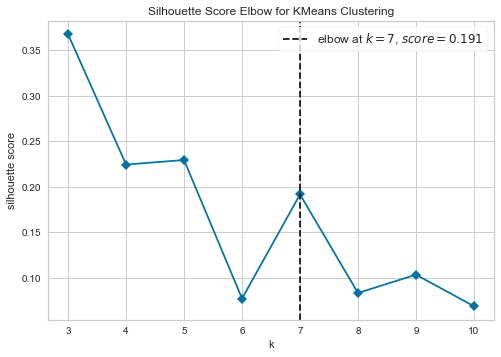

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [36]:
#!conda install -c conda-forge yellowbrick --yes
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# set number of clusters
# kclusters = 6
kclusters = (3,11)

boroughs_grouped_clustering = boroughs_grouped.drop('Neighbourhood', 1)

# run k-means clustering
# kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(downtown_grouped_clustering)
model = KMeans(random_state=0)
# visualizer = KElbowVisualizer(model, k=kclusters, metric='calinski_harabasz', timings=False) # random state=0
visualizer = KElbowVisualizer(model, k=kclusters, metric='silhouette', timings=False) # random state = 0

visualizer.fit(boroughs_grouped_clustering)        # Fit the data to the visualizer
visualizer.show()                                  # Finalize and render the figure

# check cluster labels generated for each row in the dataframe
# kmeans.labels_

The plot shows that the highest Calinski-Harabasz value occurs at four clusters, suggesting that the optimal number of clusters is four.

In [37]:
# run k-means clustering
kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(boroughs_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1])

__2. Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.__


In [38]:
# add clustering labels
# neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted['Cluster Labels'] = pd.Series(kmeans.labels_)

boroughs_merged = boroughs_df

# merge boroughs_grouped with boroughs_df to add latitude/longitude for each neighborhood
boroughs_merged = boroughs_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')

boroughs_merged.head()

,PostalCode,Borough,Neighbourhood,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,M4B,East York,Parkview Hill,43.70718,-79.31192,Brewery,Pizza Place,Bakery,Gastropub,Office,Coffee Shop,Café,Soccer Stadium,Gym / Fitness Center,Bank,1
1,M4C,East York,Woodbine Heights,43.68970,-79.30682,Pizza Place,Coffee Shop,Ice Cream Shop,Sandwich Place,Bakery,Sushi Restaurant,Skating Rink,Park,Bar,Bank,1
2,M6C,York,Humewood-Cedarvale,43.69211,-79.43036,Pizza Place,Coffee Shop,Convenience Store,Grocery Store,Bus Stop,Beer Store,Middle Eastern Restaurant,Field,Park,Bus Line,1
3,M6E,York,Caledonia-Fairbanks,43.68784,-79.45046,Pizza Place,Bus Stop,Park,Coffee Shop,Japanese Restaurant,ATM,Cosmetics Shop,Food Truck,Mexican Restaurant,Portuguese Restaurant,1
4,M4G,East York,Leaside,43.70902,-79.36349,Coffee Shop,Sporting Goods Shop,Grocery Store,Electronics Store,Furniture / Home Store,Sports Bar,Burger Joint,Restaurant,Brewery,Department Store,1


In [39]:
columns = [column for column in boroughs_merged.columns if column.endswith('Venue')]
columns = ['Borough', 'Neighbourhood', 'Cluster Labels'] + columns
boroughs_merged[columns]

,Borough,Neighbourhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East York,Parkview Hill,1,Brewery,Pizza Place,Bakery,Gastropub,Office,Coffee Shop,Café,Soccer Stadium,Gym / Fitness Center,Bank
1,East York,Woodbine Heights,1,Pizza Place,Coffee Shop,Ice Cream Shop,Sandwich Place,Bakery,Sushi Restaurant,Skating Rink,Park,Bar,Bank
2,York,Humewood-Cedarvale,1,Pizza Place,Coffee Shop,Convenience Store,Grocery Store,Bus Stop,Beer Store,Middle Eastern Restaurant,Field,Park,Bus Line
3,York,Caledonia-Fairbanks,1,Pizza Place,Bus Stop,Park,Coffee Shop,Japanese Restaurant,ATM,Cosmetics Shop,Food Truck,Mexican Restaurant,Portuguese Restaurant
4,East York,Leaside,1,Coffee Shop,Sporting Goods Shop,Grocery Store,Electronics Store,Furniture / Home Store,Sports Bar,Burger Joint,Restaurant,Brewery,Department Store
5,East York,Thorncliffe Park,1,Indian Restaurant,Afghan Restaurant,Coffee Shop,Grocery Store,Turkish Restaurant,Restaurant,Yoga Studio,Pizza Place,Clothing Store,Skating Rink
6,East York,East Toronto,1,Coffee Shop,Café,Thai Restaurant,Pizza Place,Ethiopian Restaurant,Sandwich Place,Gastropub,Beer Store,American Restaurant,Beer Bar
7,York,Del Ray,3,Playground,Fast Food Restaurant,Coffee Shop,Grocery Store,Sandwich Place,Gas Station,ATM,Neighborhood,Middle Eastern Restaurant,Modern European Restaurant
8,Central Toronto,Lawrence Park,1,Café,Bus Line,Bookstore,Park,Trail,Coffee Shop,College Gym,College Quad,Gym / Fitness Center,Restaurant
9,Central Toronto,Roselawn,2,Pharmacy,Trail,Playground,Café,Bank,Skating Rink,Office,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater


In [40]:
temp = boroughs_merged[[column for column in boroughs_merged.columns if (column.startswith('1st')) | (column.startswith('2')) | (column.startswith('3')) | (column=='Cluster Labels')]]
temp

,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,Cluster Labels
0,Brewery,Pizza Place,Bakery,1
1,Pizza Place,Coffee Shop,Ice Cream Shop,1
2,Pizza Place,Coffee Shop,Convenience Store,1
3,Pizza Place,Bus Stop,Park,1
4,Coffee Shop,Sporting Goods Shop,Grocery Store,1
5,Indian Restaurant,Afghan Restaurant,Coffee Shop,1
6,Coffee Shop,Café,Thai Restaurant,1
7,Playground,Fast Food Restaurant,Coffee Shop,3
8,Café,Bus Line,Bookstore,1
9,Pharmacy,Trail,Playground,2


In [41]:
# boroughs_merged.iloc[9,:]

In [42]:
# Remove any NaN
# boroughs_merged.dropna(inplace=True)
# boroughs_merged.shape

In [43]:
# boroughs_merged['Cluster Labels']=boroughs_merged['Cluster Labels'].astype('int64')
# boroughs_merged.info()

__3. Finally, let's visualize the resulting clusters__

In [44]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium # map rendering library

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(boroughs_merged['latitude'], boroughs_merged['longitude'], boroughs_merged['Neighbourhood'], boroughs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

<a id=''></a>

# Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster.

## Cluster 1

In [45]:
cluster_0 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 0, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
print(cluster_0.shape)
cluster_0

(1, 12)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
10,Runnymede,Brewery,Gas Station,Department Store,BBQ Joint,Supermarket,Sandwich Place,Storage Facility,Thai Restaurant,Thrift / Vintage Store,Coffee Shop,0


## Cluster 2

In [46]:
cluster_1 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 1, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
print(cluster_1.shape)
cluster_1

(16, 12)


,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
0,Parkview Hill,Brewery,Pizza Place,Bakery,Gastropub,Office,Coffee Shop,Café,Soccer Stadium,Gym / Fitness Center,Bank,1
1,Woodbine Heights,Pizza Place,Coffee Shop,Ice Cream Shop,Sandwich Place,Bakery,Sushi Restaurant,Skating Rink,Park,Bar,Bank,1
2,Humewood-Cedarvale,Pizza Place,Coffee Shop,Convenience Store,Grocery Store,Bus Stop,Beer Store,Middle Eastern Restaurant,Field,Park,Bus Line,1
3,Caledonia-Fairbanks,Pizza Place,Bus Stop,Park,Coffee Shop,Japanese Restaurant,ATM,Cosmetics Shop,Food Truck,Mexican Restaurant,Portuguese Restaurant,1
4,Leaside,Coffee Shop,Sporting Goods Shop,Grocery Store,Electronics Store,Furniture / Home Store,Sports Bar,Burger Joint,Restaurant,Brewery,Department Store,1
5,Thorncliffe Park,Indian Restaurant,Afghan Restaurant,Coffee Shop,Grocery Store,Turkish Restaurant,Restaurant,Yoga Studio,Pizza Place,Clothing Store,Skating Rink,1
6,East Toronto,Coffee Shop,Café,Thai Restaurant,Pizza Place,Ethiopian Restaurant,Sandwich Place,Gastropub,Beer Store,American Restaurant,Beer Bar,1
8,Lawrence Park,Café,Bus Line,Bookstore,Park,Trail,Coffee Shop,College Gym,College Quad,Gym / Fitness Center,Restaurant,1
11,Weston,Train Station,Pizza Place,Discount Store,Soccer Field,Fried Chicken Joint,Laundromat,Skating Rink,Middle Eastern Restaurant,Sandwich Place,Diner,1
12,Davisville North,Coffee Shop,Pizza Place,Italian Restaurant,Café,Dessert Shop,Restaurant,Sushi Restaurant,Park,Pharmacy,Thai Restaurant,1


In [47]:
first = cluster_1.iloc[:,0:2].groupby('1st Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
first.rename(columns={'1st Most Common Venue':'Venue'}, inplace=True)
first

,Venue,Neighbourhood
0,Coffee Shop,6
1,Pizza Place,3
2,Café,2
3,Brewery,1
4,Grocery Store,1
5,Indian Restaurant,1
6,Italian Restaurant,1
7,Train Station,1


In [48]:
second = cluster_1[['Neighbourhood','2nd Most Common Venue']].groupby('2nd Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
second.rename(columns={'2nd Most Common Venue':'Venue'}, inplace=True)
second

,Venue,Neighbourhood
0,Coffee Shop,4
1,Pizza Place,3
2,Afghan Restaurant,1
3,Bus Line,1
4,Bus Stop,1
5,Café,1
6,Gym,1
7,Italian Restaurant,1
8,Restaurant,1
9,Sporting Goods Shop,1


In [49]:
third = cluster_1[['Neighbourhood','3rd Most Common Venue']].groupby('3rd Most Common Venue').count().sort_values(by='Neighbourhood', ascending=False).reset_index()
third.rename(columns={'3rd Most Common Venue':'Venue'}, inplace=True)
third

,Venue,Neighbourhood
0,Italian Restaurant,5
1,Park,2
2,Bakery,1
3,Bookstore,1
4,Coffee Shop,1
5,Convenience Store,1
6,Discount Store,1
7,Grocery Store,1
8,Ice Cream Shop,1
9,Indian Restaurant,1


In [50]:
cluster_0_top3 = pd.concat([first, second, third])
cluster_0_top3 = cluster_0_top3.groupby(by='Venue').sum().sort_values(by='Neighbourhood', ascending=False)
cluster_0_top3

,Neighbourhood
Venue,
Coffee Shop,11
Italian Restaurant,7
Pizza Place,6
Café,3
Indian Restaurant,2
Park,2
Grocery Store,2
Afghan Restaurant,1
Thai Restaurant,1


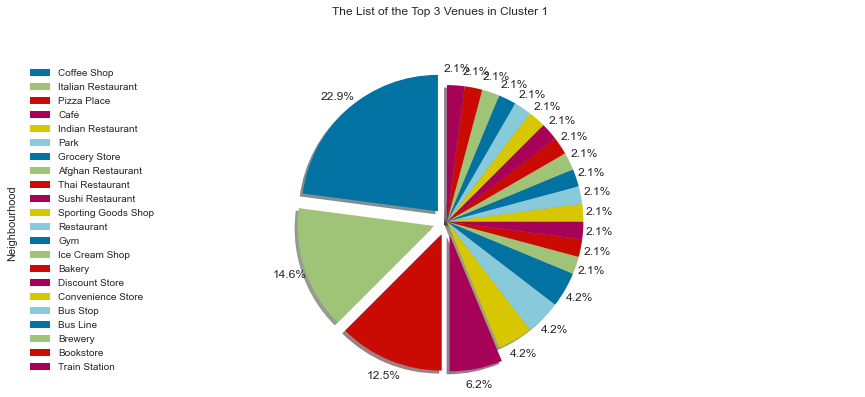

In [51]:
# colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
# ratio for each venue with which to offset each wedge.
explode_list = [0.1, 0.1, 0.1, 0.1, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

cluster_0_top3['Neighbourhood'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
#                             colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('The List of the Top 3 Venues in Cluster 1', y=1.12, loc='center') 

plt.axis('equal') 

# add legend
plt.legend(labels=cluster_0_top3.index, loc='upper left') 

plt.show()

## Cluster 3

In [52]:
cluster_2 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 2, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_2

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
9,Roselawn,Pharmacy,Trail,Playground,Café,Bank,Skating Rink,Office,Middle Eastern Restaurant,Modern European Restaurant,Movie Theater,2


## Cluster 4

In [53]:
cluster_3 = boroughs_merged.loc[boroughs_merged['Cluster Labels'] == 3, boroughs_merged.columns[[2] + list(range(5, boroughs_merged.shape[1]))]]
cluster_3

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels
7,Del Ray,Playground,Fast Food Restaurant,Coffee Shop,Grocery Store,Sandwich Place,Gas Station,ATM,Neighborhood,Middle Eastern Restaurant,Modern European Restaurant,3


We can merge cluster_0, cluster_2, and cluster_3 to have better insight

In [54]:
cluster_merged = pd.concat([ cluster_0, cluster_2, cluster_3]).reset_index()
column = [column for column in cluster_merged.columns if column.endswith('Venue')]
cluster_merged[['Cluster Labels','Neighbourhood']+ column].iloc[:,0:7].set_index('Cluster Labels')

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
Cluster Labels,,,,,,
0,Runnymede,Brewery,Gas Station,Department Store,BBQ Joint,Supermarket
2,Roselawn,Pharmacy,Trail,Playground,Café,Bank
3,Del Ray,Playground,Fast Food Restaurant,Coffee Shop,Grocery Store,Sandwich Place
